## Numpy

 * 陣列導向計算
 * 有效率實作多維陣列
 * 設計為科學計算

## 簡單範例

### 利用 cvalues 列表(List)，建立一個 c Numpy 陣列，c 陣列為10個攝氏溫度，將 c 陣列內容運算轉換為華氏溫度。

In [2]:
import numpy as np
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]
c = np.array(cvalues)
print(c)
print(c * 9 / 5 + 32)

[ 20.1  20.8  21.9  22.5  22.7  22.3  21.8  21.2  20.9  20.1]
[ 68.18  69.44  71.42  72.5   72.86  72.14  71.24  70.16  69.62  68.18]


### 直接將cvalues列表轉換為華氏溫度。

In [3]:
fvalues = [ x*9/5 + 32 for x in cvalues] 
print(fvalues)

[68.18, 69.44, 71.42, 72.5, 72.86, 72.14, 71.24000000000001, 70.16, 69.62, 68.18]


### c 的資料型別為 ndarray

In [4]:
type(c)

numpy.ndarray

## 使用 matplotlab 圖形展示

In [ ]:
%matplotlib inline #可使matplotlib的結果直接顯示在jupyter中

### 畫出 cvalues

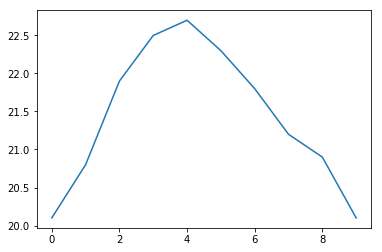

In [8]:
import matplotlib.pyplot as plt
plt.plot(c)
plt.show()

### ndarray 的記憶體比較小且較好的執行效率

In [2]:
from sys import getsizeof as size
lst = [24, 12, 57]
size_of_list_object = size(lst)   # only green box
size_of_elements = len(lst) * size(lst[0]) # 24, 12, 57
total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)

Size without the size of the elements:  88
Size of all the elements:  84
Total size of list, including elements:  172


In [3]:
lst = [24, 12, 57, 42]
size_of_list_object = size(lst)   # only green box
size_of_elements = len(lst) * size(lst[0]) # 24, 12, 57, 42
total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)
 


Size without the size of the elements:  96
Size of all the elements:  112
Total size of list, including elements:  208


In [4]:
lst = []
print("Emtpy list size: ", size(lst))

Emtpy list size:  64


In [13]:
a = np.array([24, 12, 57])
print(size(a))

120


In [14]:
e = np.array([])
print(size(e))

96


In [15]:
a = np.array([24, 12, 57], np.int8)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int16)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int32)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int64)
print(size(a) - 96)

3
6
12
24


### 計算時間比較

In [17]:
import time
size_of_vec = 10000
def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1
def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1
t1 = pure_python_version()
t2 = numpy_version()
print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

0.00363922119140625 0.0003058910369873047
Numpy is in this example 11.897116134060795 faster!


In [18]:
import numpy as np
from timeit import Timer
size_of_vec = 1000
X_list = range(size_of_vec)
Y_list = range(size_of_vec)
X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)
def pure_python_version():
    Z = [X_list[i] + Y_list[i] for i in range(len(X_list)) ]
def numpy_version():
    Z = X + Y
#timer_obj = Timer("x = x + 1", "x = 0")
timer_obj1 = Timer("pure_python_version()", 
                   "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", 
                   "from __main__ import numpy_version")
print(timer_obj1.timeit(10))
print(timer_obj2.timeit(10))

0.003315006997581804
0.00029538799935835414


In [19]:
print(timer_obj1.repeat(repeat=3, number=10))
print(timer_obj2.repeat(repeat=3, number=10))

[0.0033798470030887984, 0.0037406269984785467, 0.0035474340002110694]
[0.0006706870008201804, 2.5163000827888027e-05, 2.4805998691590503e-05]


## 建立陣列

### arange 產生一個等距陣列
### `arange([start,] stop[, step], [, dtype=None])`

In [20]:
import numpy as np
a = np.arange(1, 10) #不包括10
print(a)
x = range(1, 10)
print(x)    # x is an iterator
print(list(x))
# further arange examples:
x = np.arange(10.4)
print(x)
x = np.arange(0.5, 10.4, 0.8)
print(x)
x = np.arange(0.5, 10.4, 0.8, int)
print(x)

[1 2 3 4 5 6 7 8 9]
range(1, 10)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[  0.5   1.3   2.1   2.9   3.7   4.5   5.3   6.1   6.9   7.7   8.5   9.3
  10.1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


### linspace

### `linspace(start, stop, num=50, endpoint=True, restep=False)`
### 將(start, stop)範圍分割為num等份
### [start, stop] endpoint = True
### [start, stop) endpoint = False

In [21]:
import numpy as np
# 50 values between 1 and 10:
print(np.linspace(1, 10))
# 7 values between 1 and 10:
print(np.linspace(1, 10, 7))
# excluding the endpoint:
print(np.linspace(1, 10, 7, endpoint=False))

[  1.           1.18367347   1.36734694   1.55102041   1.73469388
   1.91836735   2.10204082   2.28571429   2.46938776   2.65306122
   2.83673469   3.02040816   3.20408163   3.3877551    3.57142857
   3.75510204   3.93877551   4.12244898   4.30612245   4.48979592
   4.67346939   4.85714286   5.04081633   5.2244898    5.40816327
   5.59183673   5.7755102    5.95918367   6.14285714   6.32653061
   6.51020408   6.69387755   6.87755102   7.06122449   7.24489796
   7.42857143   7.6122449    7.79591837   7.97959184   8.16326531
   8.34693878   8.53061224   8.71428571   8.89795918   9.08163265
   9.26530612   9.44897959   9.63265306   9.81632653  10.        ]
[  1.    2.5   4.    5.5   7.    8.5  10. ]
[ 1.          2.28571429  3.57142857  4.85714286  6.14285714  7.42857143
  8.71428571]


### 如果 restep = True，傳回分割值

In [6]:
import numpy as np
samples, spacing = np.linspace(1, 10, retstep=True)
print(spacing)
samples, spacing = np.linspace(1, 10, 20, endpoint=True, retstep=True)
print(spacing)
samples, spacing = np.linspace(1, 10, 20, endpoint=False, retstep=True)
print(spacing)

0.183673469388
0.473684210526
0.45


### 純量的維度 = 0

In [7]:
import numpy as np
x = np.array(42)
print("x: ", x)
print("The type of x: ", type(x))
print("The dimension of x:", np.ndim(x))

x:  42
The type of x:  <class 'numpy.ndarray'>
The dimension of x: 0


## 一維陣列

In [8]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
V = np.array([3.4, 6.9, 99.8, 12.8])
print("F: ", F)
print("V: ", V)
print("Type of F: ", F.dtype) #陣列元素的資料型別
print("Type of V: ", V.dtype)
print("Dimension of F: ", np.ndim(F)) #陣列維度
print("Dimension of V: ", np.ndim(V))

F:  [ 1  1  2  3  5  8 13 21]
V:  [  3.4   6.9  99.8  12.8]
Type of F:  int64
Type of V:  float64
Dimension of F:  1
Dimension of V:  1


## 二維陣列

In [25]:
A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A)
print(A.ndim)

[[  3.4   8.7   9.9]
 [  1.1  -7.8  -0.7]
 [  4.1  12.3   4.8]]
2


## 三維陣列

In [26]:
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B)
print(B.ndim)

[[[111 112]
  [121 122]]

 [[211 212]
  [221 222]]

 [[311 312]
  [321 322]]]
3


### 陣列型態 m-by-n

In [9]:
x = np.array([ [67, 63, 87],
               [77, 69, 59],
               [85, 87, 99],
               [79, 72, 71],
               [63, 89, 93],
               [68, 92, 78]])
print(np.shape(x)) # 6x3 陣列

(6, 3)


### 陣列型態可以用tuple改變

In [28]:
x.shape = (3, 6) # 3x6 陣列
print(x)

[[67 63 87 77 69 59]
 [85 87 99 79 72 71]
 [63 89 93 68 92 78]]


In [29]:
x.shape = (2, 9) # 2x9 陣列
print(x)

[[67 63 87 77 69 59 85 87 99]
 [79 72 71 63 89 93 68 92 78]]


### 純量沒有陣列型態，空tuple

In [30]:
x = np.array(11)
print(np.shape(x))

()


In [31]:
B = np.array([ [[111, 112, 113], [121, 122, 123]],
               [[211, 212, 213], [221, 222, 223]],
               [[311, 312, 313], [321, 322, 323]],
               [[411, 412, 413], [421, 422, 423]] ])
print(B.shape)

(4, 2, 3)


## 陣列指標與分割

### 一維陣列

In [32]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
# F陣列第一個元素，index = 0
print(F[0])
# F陣列最後一個元素，index = -1
print(F[-1])

1
21


### 二維陣列

In [10]:
A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A[1][0]) # 第二列、第一行元素值

1.1


In [34]:
tmp = A[1] # 第二列
print(tmp)
print(tmp[0]) # 第二列，第一行元素

[ 1.1 -7.8 -0.7]
1.1


In [35]:
print(A[1, 0]) # 第二列，第一行元素

1.1


In [36]:
S = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(S[2:5]) #顯示2-4元素值
print(S[:4])  #顯示0-3元素值
print(S[6:])  #顯示６到最後元素值
print(S[:])   #顯示全部元素

[2 3 4]
[0 1 2 3]
[6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
A = np.array([
[11, 12, 13, 14, 15],
[21, 22, 23, 24, 25],
[31, 32, 33, 34, 35],
[41, 42, 43, 44, 45],
[51, 52, 53, 54, 55]])
print(A[:3, 2:]) #顯示0-2列，2-最後行元素

[[13 14 15]
 [23 24 25]
 [33 34 35]]


In [13]:
print(A[3:, :]) #顯示3-最後列，全部行元素

[[41 42 43 44 45]
 [51 52 53 54 55]]


In [14]:
print(A[:, 4:]) #顯示全部列，第5行元素

[[15]
 [25]
 [35]
 [45]
 [55]]


### 改變陣列型態

In [40]:
X = np.arange(28).reshape(4, 7) #一維陣列改為4x7
print(X)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]]


In [41]:
print(X[::2, ::3]) #間隔值

[[ 0  3  6]
 [14 17 20]]


In [42]:
print(X[::, ::3])

[[ 0  3  6]
 [ 7 10 13]
 [14 17 20]
 [21 24 27]]


In [16]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
S = A[2:6]
S[0] = 22
S[1] = 23
print(A)

[ 0  1 22 23  4  5  6  7  8  9]


In [15]:
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst2 = lst[2:6]
lst2[0] = 22
lst2[1] = 23
print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
np.may_share_memory(A, S) # A, S分享同一記憶體

True

In [44]:
A = np.arange(12)
B = A.reshape(3, 4)
A[0] = 42
print(B)

[[42  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### 1 陣列

In [45]:
import numpy as np
E = np.ones((2,3))
print(E)
F = np.ones((3,4),dtype=int)
print(F)

[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


### 0 陣列

In [46]:
Z = np.zeros((2,4))
print(Z)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [47]:
x = np.array([2,5,18,14,4])
E = np.ones_like(x) #產生與 x 陣列相同的 1 陣列
print(E)
Z = np.zeros_like(x) #產生與 x 陣列相同的 0 陣列
print(Z)

[1 1 1 1 1]
[0 0 0 0 0]


### 陣列拷貝

In [48]:
import numpy as np
x = np.array([[42,22,12],[44,53,66]], order='F')
y = x.copy()
x[0,0] = 1001
print(x)
print(y)

[[1001   22   12]
 [  44   53   66]]
[[42 22 12]
 [44 53 66]]


In [49]:
print(x.flags['C_CONTIGUOUS'])
print(y.flags['C_CONTIGUOUS'])

False
True


## Identity 陣列

### `identity(n)`

In [51]:
import numpy as np
np.identity(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

###  `eye(m, n, k, dtype)`

In [19]:
import numpy as np
np.eye(4, 4, k=1, dtype=float)

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.]])

## Data type object

In [53]:
import numpy as np
i16 = np.dtype(np.int16)
print(i16)
lst = [ [3.4, 8.7, 9.9], 
        [1.1, -7.8, -0.7],
        [4.1, 12.3, 4.8] ]
A = np.array(lst, dtype=i16)
print(A)

int16
[[ 3  8  9]
 [ 1 -7  0]
 [ 4 12  4]]


In [54]:
import numpy as np
dt = np.dtype([('density', np.int32)])
x = np.array([(393,), (337,), (256,)],
             dtype=dt)
print(x)
print("\nThe internal representation:")
print(repr(x))

[(393,) (337,) (256,)]

The internal representation:
array([(393,), (337,), (256,)],
      dtype=[('density', '<i4')])


In [55]:
print(x['density'])

[393 337 256]


In [56]:
dt = np.dtype([('density', 'i4')])
x = np.array([(393,), (337,), (256,)],
             dtype=dt)
print(x)

[(393,) (337,) (256,)]


In [57]:
dt = np.dtype('<d') 
print(dt.name, dt.byteorder, dt.itemsize)
dt = np.dtype('>d')  
print(dt.name, dt.byteorder, dt.itemsize)
dt = np.dtype('d') 
print(dt.name, dt.byteorder, dt.itemsize)

float64 = 8
float64 > 8
float64 = 8


In [58]:
dt = np.dtype([('country', 'S20'), ('density', 'i4'), ('area', 'i4'), ('population', 'i4')])
x = np.array([('Netherlands', 393, 41526, 16928800),
('Belgium', 337, 30510, 11007020),
('United Kingdom', 256, 243610, 62262000),
('Germany', 233, 357021, 81799600),
('Liechtenstein', 205, 160, 32842),
('Italy', 192, 301230, 59715625),
('Switzerland', 177, 41290, 7301994),
('Luxembourg', 173, 2586, 512000),
('France', 111, 547030, 63601002),
('Austria', 97, 83858, 8169929),
('Greece', 81, 131940, 11606813),
('Ireland', 65, 70280, 4581269),
('Sweden', 20, 449964, 9515744),
('Finland', 16, 338424, 5410233),
('Norway', 13, 385252, 5033675)],
             dtype=dt)
print(x[:4])

[(b'Netherlands', 393,  41526, 16928800)
 (b'Belgium', 337,  30510, 11007020)
 (b'United Kingdom', 256, 243610, 62262000)
 (b'Germany', 233, 357021, 81799600)]


In [59]:
print(x['density'])
print(x['country'])
print(x['area'][2:5])

[393 337 256 233 205 192 177 173 111  97  81  65  20  16  13]
[b'Netherlands' b'Belgium' b'United Kingdom' b'Germany' b'Liechtenstein'
 b'Italy' b'Switzerland' b'Luxembourg' b'France' b'Austria' b'Greece'
 b'Ireland' b'Sweden' b'Finland' b'Norway']
[243610 357021    160]


## Numpy Arrays 數學運算

### 純量與陣列運算
- a 是一個純量
- v 是一個陣列
- a + v
- a * v
- v - a
- v ** 2
- v ** 1.5

In [20]:
import numpy as np
l = [2, 3, 7.9, 3.3, 6.9, 0.11, 10.3, 12.9]
v = np.array(l)
v = v + 2
print(v)

[  4.     5.     9.9    5.3    8.9    2.11  12.3   14.9 ]


In [21]:
print(v*2.2)

[  8.8    11.     21.78   11.66   19.58    4.642  27.06   32.78 ]


In [22]:
print(v-1.38)

[  2.62   3.62   8.52   3.92   7.52   0.73  10.92  13.52]


In [23]:
print(v**2)

[  16.       25.       98.01     28.09     79.21      4.4521  151.29
  222.01  ]


In [24]:
print(v**1.5)

[  8.          11.18033989  31.14962279  12.2015163   26.55125232
   3.06495204  43.13776768  57.51477202]


### 二陣列算數運算
$$ \left[\begin{array}
{rrr}
11 & 12 & 13 \\
21 & 22 & 23 \\
31 & 32 & 33
\end{array}\right]$$

 $$\left[\begin{array}
{rrr}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{array}\right]
$$

In [30]:
import numpy as np
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.ones((3,3))
print("Adding to arrays: ")
print(A + B)
print("\nMultiplying two arrays: ")
print(A * (B + 1))

Adding to arrays: 
[[ 12.  13.  14.]
 [ 22.  23.  24.]
 [ 32.  33.  34.]]

Multiplying two arrays: 
[[ 22.  24.  26.]
 [ 42.  44.  46.]
 [ 62.  64.  66.]]


### 矩陣相乘

In [26]:
np.dot(A, B)

array([[ 36.,  36.,  36.],
       [ 66.,  66.,  66.],
       [ 96.,  96.,  96.]])

In [27]:
print(np.dot(3, 4))
x = np.array([3])
y = np.array([4])
print(x.ndim)
print(np.dot(x, y))
x = np.array([3, -2])
y = np.array([-4, 1])
print(np.dot(x, y))

12
1
12
-14


In [28]:
A = np.array([ [1, 2, 3], 
               [3, 2, 1] ])
B = np.array([ [2, 3, 4, -2], 
               [1, -1, 2, 3],
               [1, 2, 3, 0] ])
# es muss gelten:
print(A.shape[-1] == B.shape[-2], A.shape[1]) 
print(np.dot(A, B))

True 3
[[ 7  7 17  4]
 [ 9  9 19  0]]


## Changing the Dimensions of Arrays

## 矩陣運算

* 矩陣加法
* 矩陣減法
* 矩陣乘法
* 純量雞
* cross porduct

In [1]:
import numpy as np
x = np.array([2, 4, 6])
y = np.array([1, 5, 4])
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x%y)

[ 3  9 10]
[ 1 -1  2]
[ 2 20 24]
[ 2.   0.8  1.5]
[0 4 2]


## 向量運算

In [4]:
x = np.array([3,2])
y = np.array([5,1])
print(x+y)
print(x-y)
print(np.dot(x,y))

[8 3]
[-2  1]
17


## Matplotlib Introduction
## Spines and Ticks
## Legends and Annotations
## Multiple Figures and Axes
## Histograms
## Contour Plots